## TensorFlow

**TF** is an open-source ML library. It has two main components:

* Graphs
* Sessions

TF creates a Graphs of working sessions. When we create a variable, it gets added to the graphs, and when we declare its value, its formula gets stored, but not evaluated. If $v_1 = v_3+v_4 \text{ and } v_3 = v_2*2$ The graph will represent the relationship between this vectors as a graph, and it will know that in order to evaluate v1, we need to know v2.

A **session** is a way of executing a graph, or part of a graph. As we move through the graph, we start at the lowest level, where nothing is dependent of anything else, and we move to the upper levels, calculating only what we need.

A **tensor** is a vector or matrix generalised to any dimensions. An n-dimensional array of a base datatype. Each tensor represents a partially defined computation that will eventually produce a value. 

### Creating Tensors

In [1]:
import tensorflow as tf

In [3]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

#This tensors have a shape of (1,), therefore they are scalars, just one value.

### Rank/Degree of Tensors

The rank of a tensor is the dimension of the tensor

In [12]:
rank1_tensor = tf.Variable(["Test0","Test1","Test2"], tf.string)
rank2_tensor = tf.Variable([["test00","test01","test02"],["test10","test11","test12"]], tf.string)

tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

### Shape of a tensor
It's the amount of elements in each dimension.

In [13]:
rank2_tensor.shape

TensorShape([2, 3])

### Changing shapes

In [38]:
tensor1 = tf.ones([2,3,4])
tensor2 = tf.reshape(tensor1,[2,12]) #as long as the shape multiplied is the same, the reshaping is correct
tensor2

<tf.Tensor: shape=(2, 12), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [35]:
tensor3 = tf.reshape(tensor1, [4,2,-1]) #-1 calculates the necessary value to reshape correctly (it will determine 3)
tensor3

<tf.Tensor: shape=(4, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

### Types of tensors
* **Variables**: it's the only one whose value can change
* **Constants**
* **Placeholders**
* **SparseTensors**

---

## Core Learning Algorithms
Some of the main algorithms used in machine learning are:
* Linear Regression
* Classification
* Clustering
* Hidden Markov Models

### Linear Regression
Linear regression is used to predict numeric values, creating a linear correspondance between datapoints.


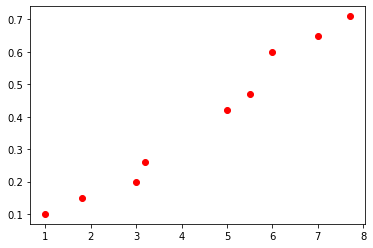

In [43]:
import matplotlib.pyplot as plt 
import numpy as np

x = [1,1.8,3,3.2,5,5.5,6,7,7.7]
y = [0.1,0.15,0.2,0.26,0.42,0.47,0.6,0.65,0.71]

plt.plot(x,y,'ro')

We can draw a *line of best fit* through these datapoints.

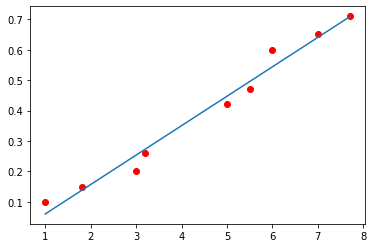

In [59]:
plt.plot(x,y,'ro')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

This line can be defined as $y=mx+b$ where $b$ is the $y$ intersect (where the line intersects the axis $x=0$), and where $m$ is the slope.

In [68]:

from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc 
import tensorflow as tf 

#Load dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')   # testing data

y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

dftrain.head()


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [69]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [71]:
dftrain.shape

(627, 9)

<AxesSubplot:>

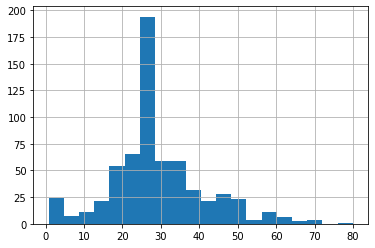

In [72]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

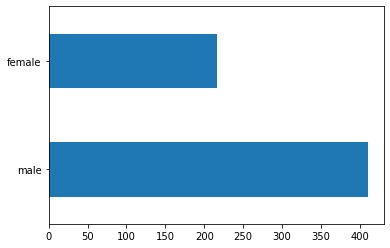

In [73]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

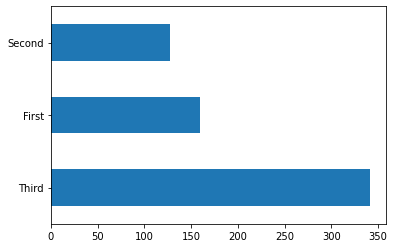

In [74]:
dftrain['class'].value_counts().plot(kind='barh')

In [80]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean()

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64

<AxesSubplot:ylabel='sex'>

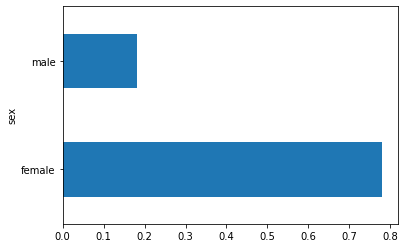

In [81]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh')

#### Creating feature columns

We need to encode categorical data to numeric data, such as:
female = 0
male = 1

In [83]:
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLUMNS = ['age','fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocab = dftrain[feature_name].unique() #gets a list of unique values for feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocab))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

feature_columns

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.strin

#### Training the model
Because datasets may be too large to fit in memory, we use **batches** to divide the data and not feed it all at once to the model. We feed all batches multiple time, according to the number of **epochs**.

In [85]:
def make_input_fn(data_df, label_df, num_epochs=10,shuffle=True, batch_size=32):
    def input_function():
        ds=tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [86]:
#creating the model
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0i_d5shm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [92]:
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

print(result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0i_d5shm/model.ckpt-800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 800...
INFO:tensorflow:Saving checkpoints for 800 into /tmp/tmp0i_d5shm/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 800...
INFO:tensorflow:loss = 0.33760798, step = 800
INFO:tensorflow:global_step/sec: 128.273
INFO:tensorflow:loss = 0.35199386, step = 900 (0.784 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmp0i_d5shm/model.ckpt.
Instructions for updating:
Use standard file APIs to delete files with this prefix.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000.

Accuracy is around 75%

#### Making predictions

In [104]:
n=6
result = list(linear_est.predict(eval_input_fn))
result[n]["probabilities"][1]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0i_d5shm/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.41907263

In [105]:
print(dfeval.loc[n])
print(y_eval.loc[n])


sex                        female
age                           8.0
n_siblings_spouses              3
parch                           1
fare                       21.075
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 6, dtype: object
0


### Classification
Used to classify data into labels.



In [106]:
CSV_COLUMN_NAMES = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
SPECIES = ['Setosa','Versicolor','Virginica']

In [111]:
train = pd.read_csv(tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"), names=CSV_COLUMN_NAMES, header=0)

test = pd.read_csv(tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"), names=CSV_COLUMN_NAMES, header=0)



In [112]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [113]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [115]:
train.shape

(120, 4)

In [118]:
def input_fn(features,labels,training=True,batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

In [119]:
feature_columns = []
for key in train.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))

feature_columns

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

#### Building the Model
Some of the options we have for classifiers are DNNClassifier (Deep Neural Network), or a LinearClassifier.

In [121]:
#Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each

classifier = tf.estimator.DNNClassifier(
    feature_columns = feature_columns,
    hidden_units=[30,10],
    n_classes=len(SPECIES))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpk9jzfv1m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [124]:
classifier.train(input_fn=lambda: input_fn(train,train_y,training=True),steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpk9jzfv1m/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 5000...
INFO:tensorflow:Saving checkpoints for 5000 into /tmp/tmpk9jzfv1m/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 5000...
INFO:tensorflow:loss = 0.33993173, step = 5000
INFO:tensorflow:global_step/sec: 197.068
INFO:tensorflow:loss = 0.34212303, step = 5100 (0.509 sec)
INFO:tensorflow:global_step/sec: 269.145
INFO:tensorflow:loss = 0.32190955, step = 5200 (0.371 sec)
INFO:tensorflow:global_step/sec: 247.321
INFO:tensorflow:loss = 0.32759973, step = 5300 (0.406 sec)
INFO:tensorflow:global_step/sec: 180.015
INFO:tensorflow:loss = 0.3288281, step = 5400 (0.554 sec)
INFO:tens

In [125]:
classifier.evaluate(input_fn=lambda: input_fn(test,test_y,training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-16T02:57:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpk9jzfv1m/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.46306s
INFO:tensorflow:Finished evaluation at 2021-05-16-02:57:30
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.96666664, average_loss = 0.25413314, global_step = 10000, loss = 0.25413314
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: /tmp/tmpk9jzfv1m/model.ckpt-10000


{'accuracy': 0.96666664,
 'average_loss': 0.25413314,
 'loss': 0.25413314,
 'global_step': 10000}

### Clustering
Unsupervised. Finds clusters of similar datapoints. The amount of clusters may or may not be defined.

#### K-means algorithm
1. Start by placing k centroids randomly
2. We assign each datapoint to the centroid by distance
3. Find the center of mass of the datapoints assigned to each centroid
4. Move centroid to the center of mass of its clusters
5. Reassign datapoints
6. Repeat until datapoints don't change clusters


### Hidden Markov Models
HMM are a finite set of states associated with probability distributions. For example, if today was sunny, there's an 80% chance tomorrow will be sunny again, and 20% that it will rain. To create an HMM we need:
* States
* Observation Distribution → likelihood of event happening in state 
* Transition Distribution → likelihood of transitioning to another state

In [132]:
import tensorflow as tf 
import tensorflow_probability as tfp

* Cold days are encoded by 0 and hot by 1
* The first day has an 80% chance of being cold (0)
* A cold day has a 30% chance of being followed by a hot day
* A hot day has a 20% chance of being followed by a cold day
* On cold days, mean and sdev temperature are 0 and 5, and on hot days they are 15 and 10

In [142]:
tfd = tfp.distributions

initial_dist = tfd.Categorical(probs=[0.8,0.2])
transition_dist = tfd.Categorical(probs=[[0.7,0.3],[0.2,0.8]])
observation_dist = tfd.Normal(loc=[0.,15.],scale=[5., 10.])

In [143]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_dist,
    transition_distribution=transition_dist,
    observation_distribution=observation_dist,
    num_steps=7
)

In [144]:
mean = model.mean()

print(mean)

tf.Tensor([2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ], shape=(7,), dtype=float32)


---
## Neural Networks
### Activation Functions
* Relu: Rectified Linear Unit, replaces negative values with 0

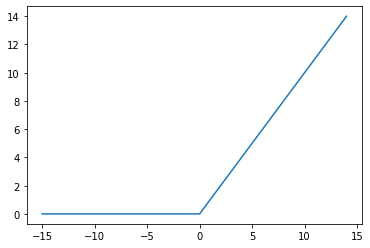

In [151]:
from matplotlib import pyplot as plt
x = [i-15 for i in range(30)]
y = [0 if x[i]<0 else x[i] for i in range(30)]
_ = plt.plot(x,y)

* Tanh squeezes between -1 and 1
* Sigmoid squeezes between 0 and 1

### Training
The **Loss** represents how bad our result is. Some options are:
* Mean Abosulute Error
* Mean Squared Error
* Hinge Loss

The Loss function creates the surface whose gradient descent we will use to adjust the weights.

The **optimizer** implements the backpropagation. Some algorithms include:
* Gradient descent
* Stochastic Gradient descent
* Mini Batch Gradient descent
* Momentum
* Nesterov Accelerated Gradient
* Adam

In [152]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 

fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 1s 0us/step


In [162]:
from PIL import Image
w, h = 28, 28
data = np.zeros((h, w), dtype=np.uint8)
img = Image.fromarray(train_images[0])
img.show()

In [164]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

(60000,)

In [165]:
#preprocessing
train_images, test_images = train_images/255, test_images/255

In [220]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation='sigmoid'),
    keras.layers.Dense(10,activation='softmax')
])


model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=6,batch_size=32)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5171 - accuracy: 0.8184
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3863 - accuracy: 0.8603
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3488 - accuracy: 0.8731
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3213 - accuracy: 0.8820
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014 - accuracy: 0.8892
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2858 - accuracy: 0.8945


In [221]:
model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8787


[0.34000203013420105, 0.8787000179290771]

---
## Convolutional NN and Computer Vision

Convolutional NNs, unlike sequential NNs, can learn patters and find them anywhere in the data. They will develop filters and overlay them over the data to find matches with the patterns (feature maps). We stack convolutional layers to find small patterns, then larger patterns-of-patterns, and so on.

* **Padding** is used to be able to find patterns in the borders, so that all datapoints can be at the center of a filter.
* The **Stride** is the amount of datapoints we move when we move the filter each time.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images,test_labels) = datasets.cifar10.load_data()

#normalize
train_images, test_images = train_images/255.0,test_images/255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 30s 0us/step


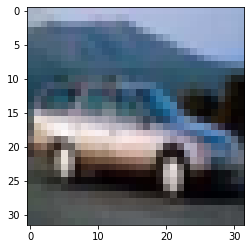

In [8]:
plt.imshow(train_images[4],cmap=plt.cm.binary)
plt.show()

A common architecture is a stack of Conv2D and MaxPooling2D layers followed by a densely connected layers, so the first stacks find the features, and the dense layers classify the image.

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

In [16]:
#30,30 because no padding, then bigger patterns, 15, then 6
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [17]:
#we add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

history = model.fit(train_images,train_labels,epochs=6, validation_data=(test_images,test_labels))

Epoch 1/6
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5229 - accuracy: 0.4414 - val_loss: 1.2578 - val_accuracy: 0.5469
Epoch 2/6
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1784 - accuracy: 0.5823 - val_loss: 1.0934 - val_accuracy: 0.6134
Epoch 3/6
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0250 - accuracy: 0.6393 - val_loss: 1.0150 - val_accuracy: 0.6420
Epoch 4/6
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9317 - accuracy: 0.6748 - val_loss: 0.9491 - val_accuracy: 0.6679
Epoch 5/6
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8569 - accuracy: 0.6981 - val_loss: 0.9379 - val_accuracy: 0.6689
Epoch 6/6
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7955 - accuracy: 0.7212 - val_loss: 0.8963 - val_accuracy: 0.6905


In [22]:
model.evaluate(train_images,train_labels)

1563/1563 [==============================] - 19s 12ms/step - loss: 0.7289 - accuracy: 0.7456


[0.7288769483566284, 0.7455800175666809]

---
## Recurrent NNs and NLP
NLP is the field of processing human language with computers.

### Data encoding

* **Bag of Words**: Every different word in the dataset is encoded as an integer. We visualize a dataset as the code for the words it contains, and its frequency. This approach is flawed when representing complex data where word order matters, like sentiment analysis.

* **Word sequences**: Like BoW, but stores the order. It's still flawed, because words with encoding very far apart can have similar meanings, and it's hard for the model to tell that.

* **Word embeddings**: Represent words as vectors, where every component of the vector is the coordinates of the word in a "meaning space", such that similar words are close-by in the space, hopefully. Word embeddings has to be learning as a layer in the model.

### Recurrent Neural Networks
Recurrent NNs are ideal for text processing, as they use past data to inform their predictions. The textual data has to be encoded in some way. Recurrent NNs contain internal loops, and mantain a "memory" of what they have already seen.

---
## Reinforncment Learning
In reinforncment learning, a model consists of an **agent** interacting with an **environment**. The model will be in a **state**, telling us the status of the agent and the environment, and the agent may take **actions** to change that state (or not). The agent is given a **reward** for getting close to the goal, and it will learn from it.

### Q-Learning
To learn in a reinforncment learning model, we can use Q-Learning, which consists of a matrix of action-rewards values, called the Q-Matrix of shape (possible states, possible actions). The value of each cell is the predicted reward for that action in that state. The Q-Matrix will be determined during learning, by picking actions, at first randomly, then from the matrix. A balance must be found between randomness and picking the best known action. To update the Q-Matrix we use the formula:

$$Q[state,action] = Q[state,action]+\alpha*(reward +\gamma*max(Q[newState,:])-Q[state,action])$$

Where $\alpha$ is the *Learning Rate*, to limit how much the results of an action can update the table, so we update the values progressively.

And where $\gamma$ is the *Discount Factor*, which helps factor in the potential reward of actions taken from the next state, so we don't fall into local maximums.